In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
df_DL = pd.read_csv('../../datasets/DeliveryList.csv')
df_DL

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1
...,...,...,...,...,...,...,...
14995,2019-08-07,V2_500,8.801046e+12,발주가능,24,세탁세제,3
14996,2019-08-07,V2_501,8.801046e+12,발주가능,0,세탁세제,7
14997,2019-08-07,V2_502,8.801046e+12,발주가능,66,세탁세제,16
14998,2019-08-07,V2_509,8.801046e+12,발주가능,64,세탁세제,6


In [20]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [21]:
df_DL.describe(include=object) 

,날짜,상품명,발주가능상태,카테고리
count,15000,15000,15000,15000
unique,84,528,3,8
top,2019-05-26,V2_114,발주가능,세탁세제
freq,226,47,14700,4265


In [50]:
df_DL['날짜_datetime'] = pd.to_datetime(df_DL['날짜']) # 날짜에서 datetime

In [51]:
df_DL.describe(include=datetime) # 확인 필요 

NameError: name 'datetime' is not defined

In [52]:
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,날짜_datetime_year,날짜_datetime_month,날짜_datetime_week
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,5,5,20
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,5,5,20


In [53]:
# df_DL['날짜_datetime_year'] = df_DL['날짜_datetime'].dt.year   # 날짜_datetime_year 년 ,월 따로 보고 싶을 때 
df_DL['날짜_datetime_month'] = df_DL['날짜_datetime'].dt.month 

<Axes: xlabel='날짜_datetime_month'>

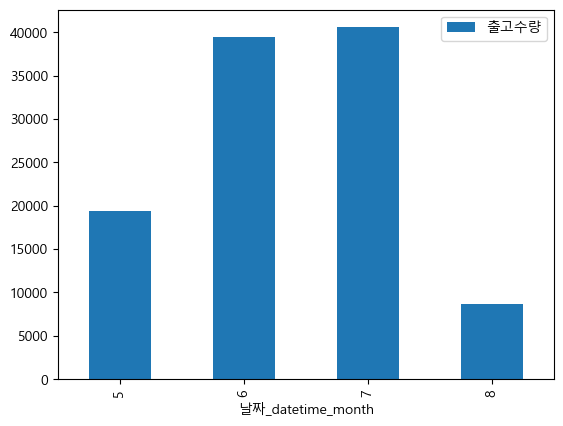

In [54]:
pd.pivot_table(data=df_DL, index='날짜_datetime_month', values='출고수량', aggfunc=sum).plot(kind='bar')  # 1차 방법 (2차 데이터 사용시)

<Axes: xlabel='날짜_datetime_month', ylabel='출고수량'>

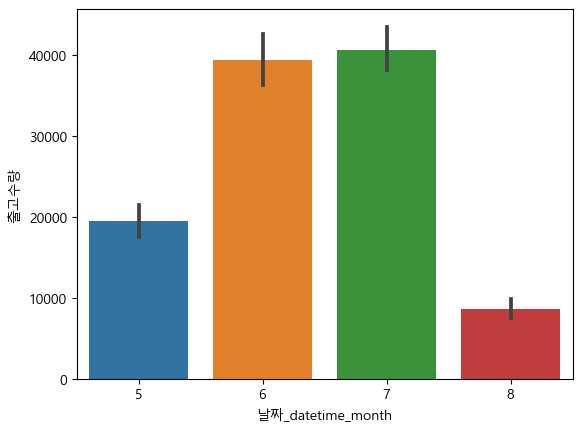

In [55]:
sns.barplot(data=df_DL, x='날짜_datetime_month', y='출고수량', estimator='sum') # 2차 방법 (단순 시각화)

In [56]:
df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.weekofyear

C:\Users\04-02\AppData\Local\Temp\ipykernel_7436\2556811622.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.weekofyear


<Axes: xlabel='날짜_datetime_week', ylabel='출고수량'>

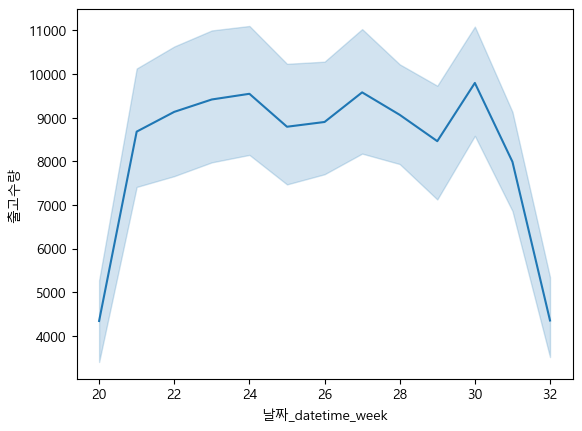

In [60]:
sns.lineplot(data=df_DL, x='날짜_datetime_week', y='출고수량', estimator='sum')